In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
melb = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')
melb

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [3]:
melb2 = melb.drop(melb[melb.Price.isna() == True].index, axis=0)
melb2

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63016,Frankston,4/34 Petrie St,2,u,347700.0,SP,Aquire,31/03/2018,3199,South-Eastern Metropolitan,17055,38.0,Frankston City Council
63017,Preston,229 Murray Rd,3,h,808000.0,S,RW,31/03/2018,3072,Northern Metropolitan,14577,8.4,Darebin City Council
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council


In [4]:
melb2.Price.describe()

count    4.843300e+04
mean     9.978982e+05
std      5.934989e+05
min      8.500000e+04
25%      6.200000e+05
50%      8.300000e+05
75%      1.220000e+06
max      1.120000e+07
Name: Price, dtype: float64

In [5]:
iqr = melb2.Price.quantile(.75)- melb2.Price.quantile(.25)
lower_bound = melb2.Price.quantile(.25) - (1.5*iqr)
upper_bound = melb2.Price.quantile(.75) + (1.5*iqr)
upper_bound

2120000.0

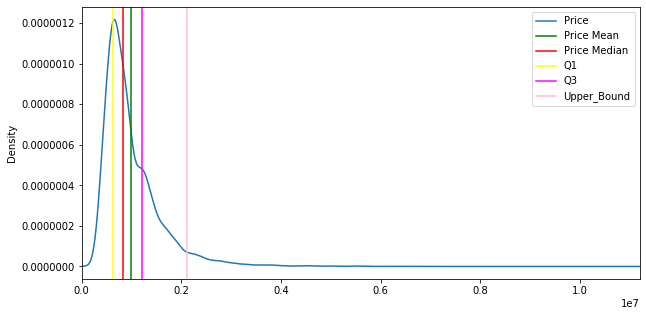

In [6]:
plt.figure(figsize=(10,5))
melb2.Price.plot.kde()
plt.xlim(0, melb2.Price.max())
plt.axvline(melb2.Price.mean(), color='green', label='Price Mean')
plt.axvline(melb2.Price.median(), color='red', label='Price Median')
plt.axvline(melb2.Price.quantile(.25), color='yellow', label='Q1')
plt.axvline(melb2.Price.quantile(.75), color='magenta', label='Q3')
plt.axvline(upper_bound, color='pink', label='Upper_Bound')
plt.legend()
plt.show()

In [7]:
melb2[melb2.Price > upper_bound]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
33,Balwyn,9 Kenilworth St,5,h,2700000.0,PI,hockingstuart,1/04/2017,3103,Southern Metropolitan,5682,7.9,Boroondara City Council
39,Balwyn North,203 Belmore Rd,4,h,2600000.0,VB,Jellis,1/04/2017,3104,Southern Metropolitan,7809,9.7,Boroondara City Council
41,Balwyn North,9 Cumberland Av,4,h,2470000.0,PI,Fletchers,1/04/2017,3104,Southern Metropolitan,7809,9.7,Boroondara City Council
63,Black Rock,38 Ardoyne St,4,h,3000000.0,S,Buxton,1/04/2017,3193,Southern Metropolitan,2866,17.3,Bayside City Council
82,Brighton,435 New St,4,h,2250000.0,VB,Buxton,1/04/2017,3186,Southern Metropolitan,10579,10.5,Bayside City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62748,Mount Waverley,31 The Highway,5,h,2700000.0,VB,Jellis,30/12/2017,3149,Eastern Metropolitan,13366,14.2,Monash City Council
62776,Northcote,18 Thames St,5,h,2525000.0,SP,Jellis,30/12/2017,3070,Northern Metropolitan,11364,5.3,Darebin City Council
62811,Prahran,7 Trinian St,3,h,2400000.0,VB,Marshall,30/12/2017,3181,Southern Metropolitan,7717,4.6,Stonnington City Council
62951,Toorak,2 Cross St,5,h,4515000.0,PI,Kay,30/12/2017,3142,Southern Metropolitan,7217,4.1,Stonnington City Council


In [8]:
import requests

In [9]:
url = 'http://jsonplaceholder.typicode.com/users'
data = requests.get(url)
data.json()

[{'id': 1,
  'name': 'Leanne Graham',
  'username': 'Bret',
  'email': 'Sincere@april.biz',
  'address': {'street': 'Kulas Light',
   'suite': 'Apt. 556',
   'city': 'Gwenborough',
   'zipcode': '92998-3874',
   'geo': {'lat': '-37.3159', 'lng': '81.1496'}},
  'phone': '1-770-736-8031 x56442',
  'website': 'hildegard.org',
  'company': {'name': 'Romaguera-Crona',
   'catchPhrase': 'Multi-layered client-server neural-net',
   'bs': 'harness real-time e-markets'}},
 {'id': 2,
  'name': 'Ervin Howell',
  'username': 'Antonette',
  'email': 'Shanna@melissa.tv',
  'address': {'street': 'Victor Plains',
   'suite': 'Suite 879',
   'city': 'Wisokyburgh',
   'zipcode': '90566-7771',
   'geo': {'lat': '-43.9509', 'lng': '-34.4618'}},
  'phone': '010-692-6593 x09125',
  'website': 'anastasia.net',
  'company': {'name': 'Deckow-Crist',
   'catchPhrase': 'Proactive didactic contingency',
   'bs': 'synergize scalable supply-chains'}},
 {'id': 3,
  'name': 'Clementine Bauch',
  'username': 'Samantha

In [10]:
data.json()[2]['address']['geo']

{'lat': '-68.6102', 'lng': '-47.0653'}

In [11]:
pd.DataFrame(data.json())

,id,name,username,email,address,phone,website,company
0,1,Leanne Graham,Bret,Sincere@april.biz,"{'street': 'Kulas Light', 'suite': 'Apt. 556',...",1-770-736-8031 x56442,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Mu..."
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"{'street': 'Victor Plains', 'suite': 'Suite 87...",010-692-6593 x09125,anastasia.net,"{'name': 'Deckow-Crist', 'catchPhrase': 'Proac..."
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"{'street': 'Douglas Extension', 'suite': 'Suit...",1-463-123-4447,ramiro.info,"{'name': 'Romaguera-Jacobson', 'catchPhrase': ..."
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"{'street': 'Hoeger Mall', 'suite': 'Apt. 692',...",493-170-9623 x156,kale.biz,"{'name': 'Robel-Corkery', 'catchPhrase': 'Mult..."
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"{'street': 'Skiles Walks', 'suite': 'Suite 351...",(254)954-1289,demarco.info,"{'name': 'Keebler LLC', 'catchPhrase': 'User-c..."
5,6,Mrs. Dennis Schulist,Leopoldo_Corkery,Karley_Dach@jasper.info,"{'street': 'Norberto Crossing', 'suite': 'Apt....",1-477-935-8478 x6430,ola.org,"{'name': 'Considine-Lockman', 'catchPhrase': '..."
6,7,Kurtis Weissnat,Elwyn.Skiles,Telly.Hoeger@billy.biz,"{'street': 'Rex Trail', 'suite': 'Suite 280', ...",210.067.6132,elvis.io,"{'name': 'Johns Group', 'catchPhrase': 'Config..."
7,8,Nicholas Runolfsdottir V,Maxime_Nienow,Sherwood@rosamond.me,"{'street': 'Ellsworth Summit', 'suite': 'Suite...",586.493.6943 x140,jacynthe.com,"{'name': 'Abernathy Group', 'catchPhrase': 'Im..."
8,9,Glenna Reichert,Delphine,Chaim_McDermott@dana.io,"{'street': 'Dayna Park', 'suite': 'Suite 449',...",(775)976-6794 x41206,conrad.com,"{'name': 'Yost and Sons', 'catchPhrase': 'Swit..."
9,10,Clementina DuBuque,Moriah.Stanton,Rey.Padberg@karina.biz,"{'street': 'Kattie Turnpike', 'suite': 'Suite ...",024-648-3804,ambrose.net,"{'name': 'Hoeger LLC', 'catchPhrase': 'Central..."


In [12]:
url_bola = 'https://www.thesportsdb.com/api/v1/json/1/searchteams.php?t=Arsenal'
data_bola = requests.get(url_bola)
data_bola.json()

{'teams': [{'idTeam': '133604',
   'idSoccerXML': '9',
   'idAPIfootball': '42',
   'intLoved': '2',
   'strTeam': 'Arsenal',
   'strTeamShort': 'Ars',
   'strAlternate': 'Gunners, Arsenal Football Club, AFC',
   'intFormedYear': '1892',
   'strSport': 'Soccer',
   'strLeague': 'English Premier League',
   'idLeague': '4328',
   'strDivision': None,
   'strManager': '',
   'strStadium': 'Emirates Stadium',
   'strKeywords': 'Gunners, Gooners',
   'strRSS': 'https://www.allarsenal.com/feed/',
   'strStadiumThumb': 'https://www.thesportsdb.com/images/media/team/stadium/qpuxrr1419371354.jpg',
   'strStadiumDescription': 'The Emirates Stadium (known as Ashburton Grove prior to sponsorship, and as Arsenal Stadium for UEFA competitions) is a football stadium in Holloway, London, England, and the home of Arsenal. With a capacity of 60,704 it is the fourth-largest football stadium in England after Wembley Stadium, Old Trafford and Tottenham Hotspur Stadium.\r\n\r\nIn 1997, Arsenal explored the

In [13]:
data_bola.json()['teams'][0]

{'idTeam': '133604',
 'idSoccerXML': '9',
 'idAPIfootball': '42',
 'intLoved': '2',
 'strTeam': 'Arsenal',
 'strTeamShort': 'Ars',
 'strAlternate': 'Gunners, Arsenal Football Club, AFC',
 'intFormedYear': '1892',
 'strSport': 'Soccer',
 'strLeague': 'English Premier League',
 'idLeague': '4328',
 'strDivision': None,
 'strManager': '',
 'strStadium': 'Emirates Stadium',
 'strKeywords': 'Gunners, Gooners',
 'strRSS': 'https://www.allarsenal.com/feed/',
 'strStadiumThumb': 'https://www.thesportsdb.com/images/media/team/stadium/qpuxrr1419371354.jpg',
 'strStadiumDescription': 'The Emirates Stadium (known as Ashburton Grove prior to sponsorship, and as Arsenal Stadium for UEFA competitions) is a football stadium in Holloway, London, England, and the home of Arsenal. With a capacity of 60,704 it is the fourth-largest football stadium in England after Wembley Stadium, Old Trafford and Tottenham Hotspur Stadium.\r\n\r\nIn 1997, Arsenal explored the possibility of relocating to a new stadium, 

In [14]:
team = input('masukkan nama club: ')
url_bola = f'https://www.thesportsdb.com/api/v1/json/1/searchteams.php?t={team}'
data_bola = requests.get(url_bola)

for i in data_bola.json()['teams']:
    print(f"{i['strTeam']}'s stadium name is {i['strStadium']}, located at {i['strStadiumLocation']}")

masukkan nama club: manchester
Man City's stadium name is Etihad, located at Etihad Campus, Manchester
Man United's stadium name is Old Trafford, located at Trafford, Greater Manchester
Manchester Storm's stadium name is Planet Ice Altrincham, located at Altrincham, Greater Manchester
Manchester Giants's stadium name is Trafford Arena, located at Manchester
Manchester Giants's stadium name is , located at 
Manchester Thunder's stadium name is Wright Robinson Sports College , located at Manchester, UK


In [15]:
pd.DataFrame(data_bola.json()['teams'])

,idTeam,idSoccerXML,idAPIfootball,intLoved,strTeam,strTeamShort,strAlternate,intFormedYear,strSport,strLeague,...,strTeamBadge,strTeamJersey,strTeamLogo,strTeamFanart1,strTeamFanart2,strTeamFanart3,strTeamFanart4,strTeamBanner,strYoutube,strLocked
0,133613,18,50,None,Man City,None,Manchester City,1880,Soccer,English Premier League,...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,youtube.com/user/mcfcofficial,unlocked
1,133612,17,33,11,Man United,None,"Manchester United, Man Utd",1878,Soccer,English Premier League,...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,www.youtube.com/channel/UC6yW44UGJJBvYTlfC7CRg2Q,unlocked
2,136522,None,None,None,Manchester Storm,None,Manchester,2015,Ice Hockey,UK Elite Ice Hockey League,...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,www.youtube.com/channel/UCIJU4dWZJarOem5sm-MrnCA,unlocked
3,135349,None,None,None,Manchester Giants,None,,2011,Basketball,British Basketball League,...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,https://www.thesportsdb.com/images/media/team/...,,unlocked
4,136378,None,None,None,Manchester Giants,None,,0,Basketball,_Defunct Basketball Teams,...,None,None,None,None,None,None,None,None,,unlocked
5,136587,None,None,None,Manchester Thunder,None,,2005,Netball,UK Netball Superleague,...,https://www.thesportsdb.com/images/media/team/...,None,None,None,None,None,None,None,,unlocked


In [16]:
#pakai api zomat/cities
url_city = 'https://developers.zomato.com/api/v2.1/cities?q=jakarta'
key = 'd726d933f163ddd03e6bb9aed97022be'
head_info = {
    'user-key': key
}
data_city = requests.get(url_city, headers = head_info)
city_details = data_city.json()
city_details

{'location_suggestions': [{'id': 74,
   'name': 'Jakarta',
   'country_id': 94,
   'country_name': 'Indonesia',
   'country_flag_url': 'https://b.zmtcdn.com/images/countries/flags/country_94.png',
   'should_experiment_with': 0,
   'has_go_out_tab': 0,
   'discovery_enabled': 0,
   'has_new_ad_format': 1,
   'is_state': 0,
   'state_id': 0,
   'state_name': '',
   'state_code': ''}],
 'status': 'success',
 'has_more': 0,
 'has_total': 0,
 'user_has_addresses': True}

In [17]:
url_city = 'https://developers.zomato.com/api/v2.1/cities?q=jakarta'
key = 'd726d933f163ddd03e6bb9aed97022be'
head_info = {
    'user-key': key
}
data_city = requests.get(url_city, headers = head_info)
city_details = data_city.json()['location_suggestions']
city_details

[{'id': 74,
  'name': 'Jakarta',
  'country_id': 94,
  'country_name': 'Indonesia',
  'country_flag_url': 'https://b.zmtcdn.com/images/countries/flags/country_94.png',
  'should_experiment_with': 0,
  'has_go_out_tab': 0,
  'discovery_enabled': 0,
  'has_new_ad_format': 1,
  'is_state': 0,
  'state_id': 0,
  'state_name': '',
  'state_code': ''}]

In [18]:
pd.DataFrame(data_city.json()['location_suggestions'])

,id,name,country_id,country_name,country_flag_url,should_experiment_with,has_go_out_tab,discovery_enabled,has_new_ad_format,is_state,state_id,state_name,state_code
0,74,Jakarta,94,Indonesia,https://b.zmtcdn.com/images/countries/flags/co...,0,0,0,1,0,0,,


In [19]:
#pakai api zomat/location
url_city = 'https://developers.zomato.com/api/v2.1/locations?query=jakarta'
key = 'd726d933f163ddd03e6bb9aed97022be'
head_info = {
    'user-key': key
}
data_city = requests.get(url_city, headers=head_info)
city_details = data_city.json()['location_suggestions'][0]
city_details

{'entity_type': 'city',
 'entity_id': 74,
 'title': 'Jakarta',
 'latitude': -6.189281,
 'longitude': 106.836104,
 'city_id': 74,
 'city_name': 'Jakarta',
 'country_id': 94,
 'country_name': 'Indonesia'}

In [20]:
datas=data_city.json()['location_suggestions']
pd.DataFrame(datas)

,entity_type,entity_id,title,latitude,longitude,city_id,city_name,country_id,country_name
0,city,74,Jakarta,-6.189281,106.836104,74,Jakarta,94,Indonesia


In [21]:
city_id = city_details['entity_id']
entity_type = city_details['entity_type']
print(city_id, entity_type)

74 city


In [22]:
import folium

In [23]:
monas = folium.Map(location=[-6.1753924,106.8249641], 
                   tiles='OpenStreetmap', zoom_start=17)
folium.Marker(location=[-6.1746935,106.8242669],
             tooltip='Click me',
             popup='<b>Store</b>').add_to(monas)
folium.Marker(location=[-6.1754214,106.8270239],
             tooltip='Hei, di sini monas',
             popup='MONAS!',
             icon=folium.Icon(color='green', prefix='fa', icon='airbnb')).add_to(monas)
folium.Circle(location=[-6.1766397,106.8299625], radius=50,
              color='red', popup='Bus Damri',
              fill=True, fill_color='green').add_to(monas)
folium.CircleMarker(location=[-6.1752962,106.8240535], radius=50,
              color='blue', popup='Dancing Fountain',
              fill=True, fill_color='red').add_to(monas)


monas

## Tugas

menggunakan city_id dan entity_type buat sebuah dataframe yang kolomnya berisi:
1. Nama resto
2. alamat resto
3. latitude
4. longitude
5. cuisines
6. average cost for two

7. Bocoran: /location_details

In [24]:
import requests

In [25]:
url_resto = 'https://developers.zomato.com/api/v2.1/location_details?entity_id=74&entity_type=city' 
key = 'd726d933f163ddd03e6bb9aed97022be'
head_info = {
    'user_key' : key
}
data_resto = requests.get(url_resto, headers=head_info)
getDataResto = data_resto.json()

getDataResto

{'popularity': '4.98',
 'nightlife_index': '4.09',
 'nearby_res': ['18478836',
  '7410695',
  '7419154',
  '18665235',
  '18534498',
  '7404738',
  '18421271',
  '7404551',
  '18339380'],
 'top_cuisines': ['Indonesian', 'Coffee', 'Western', 'Desserts', 'Jawa'],
 'popularity_res': '100',
 'nightlife_res': '10',
 'subzone': 'Cikini',
 'subzone_id': 72789,
 'city': 'Jakarta',
 'location': {'entity_type': 'city',
  'entity_id': 74,
  'title': 'Jakarta',
  'latitude': -6.189281,
  'longitude': 106.836104,
  'city_id': 74,
  'city_name': 'Jakarta',
  'country_id': 94,
  'country_name': 'Indonesia'},
 'num_restaurant': 27022,
 'best_rated_restaurant': [{'restaurant': {'R': {'has_menu_status': {'delivery': -1,
      'takeaway': -1},
     'res_id': 18560991},
    'apikey': 'd726d933f163ddd03e6bb9aed97022be',
    'id': '18560991',
    'name': 'Lawless Burgerbar',
    'url': 'https://www.zomato.com/jakarta/lawless-burgerbar-kemang?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
    '

In [26]:
getDataResto['best_rated_restaurant']

[{'restaurant': {'R': {'has_menu_status': {'delivery': -1, 'takeaway': -1},
    'res_id': 18560991},
   'apikey': 'd726d933f163ddd03e6bb9aed97022be',
   'id': '18560991',
   'name': 'Lawless Burgerbar',
   'url': 'https://www.zomato.com/jakarta/lawless-burgerbar-kemang?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
   'location': {'address': 'Jl. Kemang Selatan VIII No. 67H-67I, Kemang, Jakarta',
    'locality': 'Kemang',
    'city': 'Jakarta',
    'city_id': 74,
    'latitude': '-6.2679110938',
    'longitude': '106.8144065514',
    'zipcode': '',
    'country_id': 94,
    'locality_verbose': 'Kemang, Jakarta'},
   'switch_to_order_menu': 0,
   'cuisines': 'Burger',
   'timings': '11h – 23h (Mon-Fri),11h – 24h (Sat),10h – 23h (Sun)',
   'average_cost_for_two': 150000,
   'price_range': 3,
   'currency': 'IDR',
   'highlights': ['Lunch',
    'Cash',
    'Credit Card',
    'Dinner',
    'Takeaway Available',
    'Debit Card',
    'Beer',
    'Table booking recommended',
  

In [27]:
getDataResto['best_rated_restaurant'][1]

{'restaurant': {'R': {'has_menu_status': {'delivery': -1, 'takeaway': -1},
   'res_id': 19189251},
  'apikey': 'd726d933f163ddd03e6bb9aed97022be',
  'id': '19189251',
  'name': 'Fried Chicken Master',
  'url': 'https://www.zomato.com/jakarta/fried-chicken-master-blok-m?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
  'location': {'address': 'Plaza Blok M, Lantai Lower Ground, Jl. Bulungan No. 76, Blok M, Jakarta',
   'locality': 'Plaza Blok M, Blok M',
   'city': 'Jakarta',
   'city_id': 74,
   'latitude': '-6.2443202406',
   'longitude': '106.7976799607',
   'zipcode': '',
   'country_id': 94,
   'locality_verbose': 'Plaza Blok M, Blok M, Jakarta'},
  'switch_to_order_menu': 0,
  'cuisines': 'Fast Food',
  'timings': '10 AM to 10 PM',
  'average_cost_for_two': 80000,
  'price_range': 2,
  'currency': 'IDR',
  'highlights': ['Lunch',
   'Cash',
   'Debit Card',
   'No Alcohol Available',
   'Dinner',
   'Takeaway Available',
   'Indoor Seating'],
  'offers': [],
  'openta

In [28]:
getDataResto['best_rated_restaurant'][0]['restaurant']

{'R': {'has_menu_status': {'delivery': -1, 'takeaway': -1},
  'res_id': 18560991},
 'apikey': 'd726d933f163ddd03e6bb9aed97022be',
 'id': '18560991',
 'name': 'Lawless Burgerbar',
 'url': 'https://www.zomato.com/jakarta/lawless-burgerbar-kemang?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
 'location': {'address': 'Jl. Kemang Selatan VIII No. 67H-67I, Kemang, Jakarta',
  'locality': 'Kemang',
  'city': 'Jakarta',
  'city_id': 74,
  'latitude': '-6.2679110938',
  'longitude': '106.8144065514',
  'zipcode': '',
  'country_id': 94,
  'locality_verbose': 'Kemang, Jakarta'},
 'switch_to_order_menu': 0,
 'cuisines': 'Burger',
 'timings': '11h – 23h (Mon-Fri),11h – 24h (Sat),10h – 23h (Sun)',
 'average_cost_for_two': 150000,
 'price_range': 3,
 'currency': 'IDR',
 'highlights': ['Lunch',
  'Cash',
  'Credit Card',
  'Dinner',
  'Takeaway Available',
  'Debit Card',
  'Beer',
  'Table booking recommended',
  'Wifi',
  'Outdoor Seating',
  'Indoor Seating',
  'Air Conditioned',
  

In [29]:
getDataResto['best_rated_restaurant'][0]['restaurant']['name']


'Lawless Burgerbar'

In [32]:
#CARA 1

#create dictionary

g = 0
dic_rest = {}
for i in getDataResto['best_rated_restaurant']:
    name = i['restaurant']['name']
    address = i['restaurant']['location']['address']
    latitude = i['restaurant']['location']['latitude']
    longitude = i['restaurant']['location']['longitude']
    cuisine = i['restaurant']['cuisines']
    costfor2 = i['restaurant']['average_cost_for_two']
    dic_rest[str(g)] = {'name': name,'address': address ,'latitude': latitude,'longitude': longitude,'cuisine': cuisine,'costfor2': costfor2}
    g+=1

#make data frame
dfx = pd.DataFrame(dic_rest)
dfx = dfx.T
dfx

,name,address,latitude,longitude,cuisine,costfor2
0,Lawless Burgerbar,"Jl. Kemang Selatan VIII No. 67H-67I, Kemang, J...",-6.2679110938,106.8144065514,Burger,150000
1,Fried Chicken Master,"Plaza Blok M, Lantai Lower Ground, Jl. Bulunga...",-6.2443202406,106.7976799607,Fast Food,80000
2,Kopi Janji Jiwa,"Ruko Citra Garden City 6, Jl. Raya Citra Garde...",-6.1257327253,106.7110633850,"Coffee, Beverages",70000
3,Haidilao Hot Pot,"Gandaria City, Lantai Ground, Jl. Sultan Iskan...",-6.2438246426,106.7838330567,Asian,200000
4,Chatime,"World Trade Center 2, Lantai Lower Ground, Jl....",-6.2155141228,106.8212854117,"Beverages, Bubble Tea",60000
5,Kokumi,"Senayan City, Lantai 5, Delicaé, Jl. Asia Afri...",-6.2274956440,106.7975777015,"Bubble Tea, Beverages",70000
6,Dookki,"Central Park, Lantai Lower Ground, Jl. Letjen ...",-6.1779162811,106.7893724889,Korean,220000
7,Hachi Grill,"Synthesis Square, Tower 2, Lantai Ground, Jl. ...",-6.2405630830,106.8373612315,"Grill, Japanese",400000
8,Union,"Plaza Senayan, Lantai Ground, Jl. Asia Afrika,...",-6.2243106418,106.7989825085,"Italian, American, Desserts",550000
9,Shabu Hachi,"Jl. Ampera Raya No. 127, Cilandak, Jakarta",-6.2807002473,106.8199399486,Japanese,350000


In [33]:
#CARA 2

#create list
new_dic = []

for q in getDataResto['best_rated_restaurant']:
    asd = []
    asd.append(q['restaurant']['name'])
    asd.append(q['restaurant']['location']['address'])
    asd.append(q['restaurant']['location']['latitude'])
    asd.append(q['restaurant']['location']['longitude'])
    asd.append(q['restaurant']['cuisines'])
    asd.append(q['restaurant']['average_cost_for_two'])
    new_dic.append(asd)

pd.DataFrame(new_dic, columns=('name','address','latitude','longitude','cuisine','cost_for_2'))



,name,address,latitude,longitude,cuisine,cost_for_2
0,Lawless Burgerbar,"Jl. Kemang Selatan VIII No. 67H-67I, Kemang, J...",-6.2679110938,106.8144065514,Burger,150000
1,Fried Chicken Master,"Plaza Blok M, Lantai Lower Ground, Jl. Bulunga...",-6.2443202406,106.7976799607,Fast Food,80000
2,Kopi Janji Jiwa,"Ruko Citra Garden City 6, Jl. Raya Citra Garde...",-6.1257327253,106.7110633850,"Coffee, Beverages",70000
3,Haidilao Hot Pot,"Gandaria City, Lantai Ground, Jl. Sultan Iskan...",-6.2438246426,106.7838330567,Asian,200000
4,Chatime,"World Trade Center 2, Lantai Lower Ground, Jl....",-6.2155141228,106.8212854117,"Beverages, Bubble Tea",60000
5,Kokumi,"Senayan City, Lantai 5, Delicaé, Jl. Asia Afri...",-6.2274956440,106.7975777015,"Bubble Tea, Beverages",70000
6,Dookki,"Central Park, Lantai Lower Ground, Jl. Letjen ...",-6.1779162811,106.7893724889,Korean,220000
7,Hachi Grill,"Synthesis Square, Tower 2, Lantai Ground, Jl. ...",-6.2405630830,106.8373612315,"Grill, Japanese",400000
8,Union,"Plaza Senayan, Lantai Ground, Jl. Asia Afrika,...",-6.2243106418,106.7989825085,"Italian, American, Desserts",550000
9,Shabu Hachi,"Jl. Ampera Raya No. 127, Cilandak, Jakarta",-6.2807002473,106.8199399486,Japanese,350000


In [34]:
# create map

jakarta = folium.Map(location=[-6.1753924,106.8249641], zoom_start=13)
for i in new_dic:
    folium.Marker(location=[i[2],i[3]],
                 tooltip=str(i[0]),
                 popup=str(f'<b>Nama:</b>{i[0]},<b>Alamat:</b>{i[1]},<b>Cuisine:</b>{i[4]},<b>Cost for 2 ppl: </b>{i[5]}'),
                 icon=folium.Icon(color='green',prefix='fa',icon='50px')).add_to(jakarta)

jakarta